# Drug Sentiment Analysis

## Problem Statement
The problem is to identify the sentiments of the user from their reviews.

### Data Description :

* drugName (categorical): name of drug
* condition (categorical): name of condition
* review (text): patient review
* rating (numerical): 10 star patient rating
* date (date): date of review entry
* usefulCount (numerical): number of users who found review useful

The structure of the data is that a patient with a unique ID purchases a drug that meets his condition and writes a review and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful, they will click usefulCount, which will add 1 for the variable.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv


In [2]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [3]:
#read the train and test data

test = pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv') #train data
train = pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv') #test data

In [4]:
#check the head of train data
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [5]:
#check the head of test data
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


By looking at the head of train and test data we see that there are 7 features in our Dataset but we don't have any sentiment feature which can serve as our target variable. We will make a target feature out of rating. If Rating is greater than 5 we will assign it as positive else we will assign it as negative.

In [6]:
#check the shape of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'train has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns


In [7]:
#check the columns in train
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

## Exploratory Data Analysis

Merge the train and test data as there are no target labels. We will perform our EDA and Pre-processing on merged data. Then we will dive the data into 70 : 30 ratio for training and testing

In [8]:
#merge train and test data

merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

### Check number of uniqueIds to see if there's any duplicate record in our dataset

In [9]:
#check uniqueID
merged_data['uniqueID'].nunique()

215063

There are 215063 uniqueIds meaning that every record is unique.

### Check information of the merged data

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
uniqueID       215063 non-null int64
drugName       215063 non-null object
condition      213869 non-null object
review         215063 non-null object
rating         215063 non-null int64
date           215063 non-null object
usefulCount    215063 non-null int64
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


### Check the Description

In [11]:
merged_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


**Following things can be noticed from the description**
* Top **drugName** is **Levonorgestrel**, It will be intresting to see for what condition it is used.
* Top **condition** is **Birth Control**.
* Top **review** is just a single word "Good", but it has very small count - 39. May be lazy people like me have written that comment.
* Most single day review came on 1-Mar-16, it will be interesting to investigate this date and see for which drugName and which conditions these reviews were for.

### Check the percentage of null values in each column

In [12]:
merged_data.isnull().sum()/merged_data.shape[0]

uniqueID       0.000000
drugName       0.000000
condition      0.005552
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

We just have null values in just 1 column i.e **condition** . We will leave the null values in that column for now as the null values are very small.

In [13]:
#check number of unique values in drugName
print(merged_data['drugName'].nunique())

#check number of unique values in condition
print(merged_data['condition'].nunique())

3671
916


We can see that there are 3671 drugName and only 916 conditions. So there are conditions which has multiple drugs.

In [14]:
#set the condition to lower case 
merged_data['condition'] =  merged_data['condition'].str.lower()

Now the time is to plot some beautiful graphs and find some interesting insights from our Data. **Here your detective skills are needed so be ready and interrogate the data as much as you can ** 

### Check the top 20 conditions

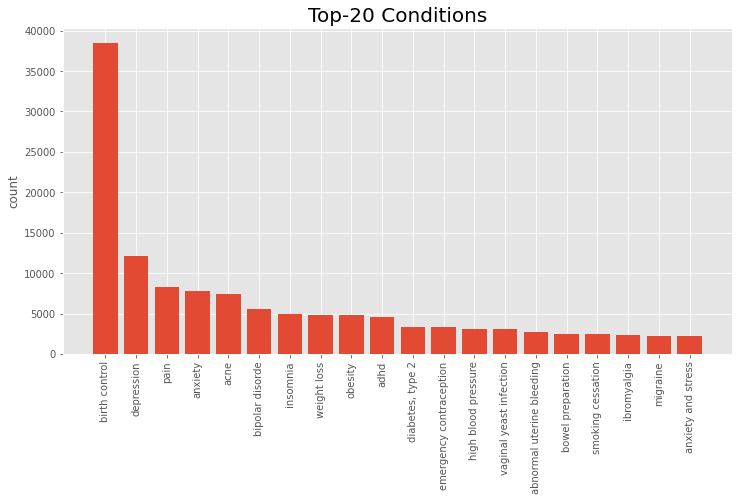

In [15]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

**From above graph we can see that the :**
* Birth control is twice as big as anyone, around 38,000.
* Most of the conditions for top 20 conditions are between 5000 - 10000 

### Plot the bottom 20 conditions

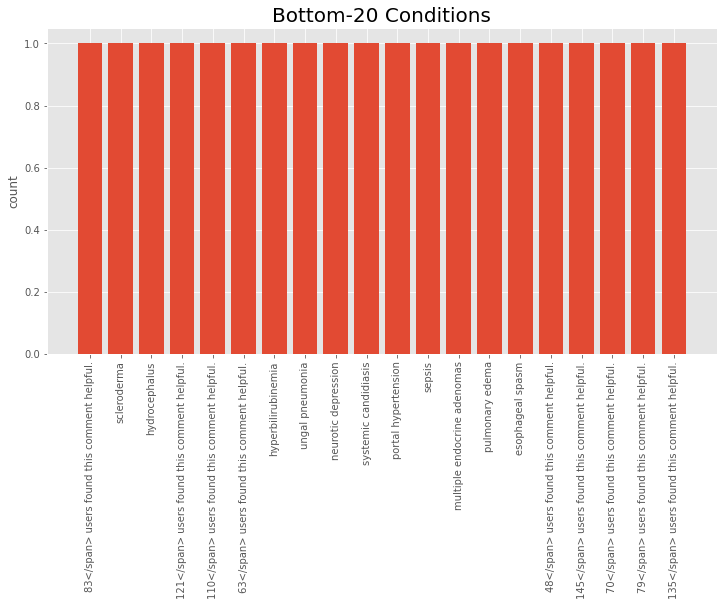

In [16]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom = merged_data['condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

* Bottom 20 conditions have just single counts in our dataset. They may be the rare conditions.
* And if we look at our plot we see that there are conditions whose name are strange starting with **"61<_/span_>users found this comment helpful"** , these are the noise present in our data. We will deal with these noise later.

### Check top 20 drugName

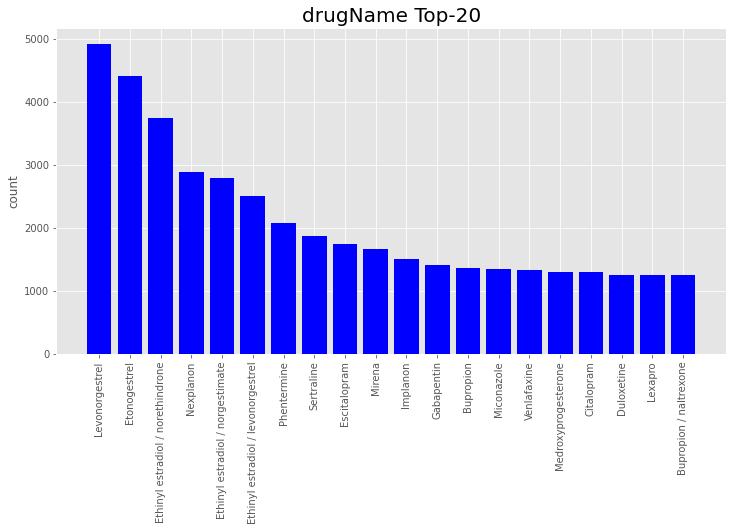

In [17]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = merged_data['drugName'].value_counts(ascending = False).head(20)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

* The top drugName is Levonorgestrel, which we had seen in description as well.
* The top 3 drugName has count around 4000 and above. 
* Most of the drugName counts are around 1500 if we look at top 20

### Check bottom 20 drugName

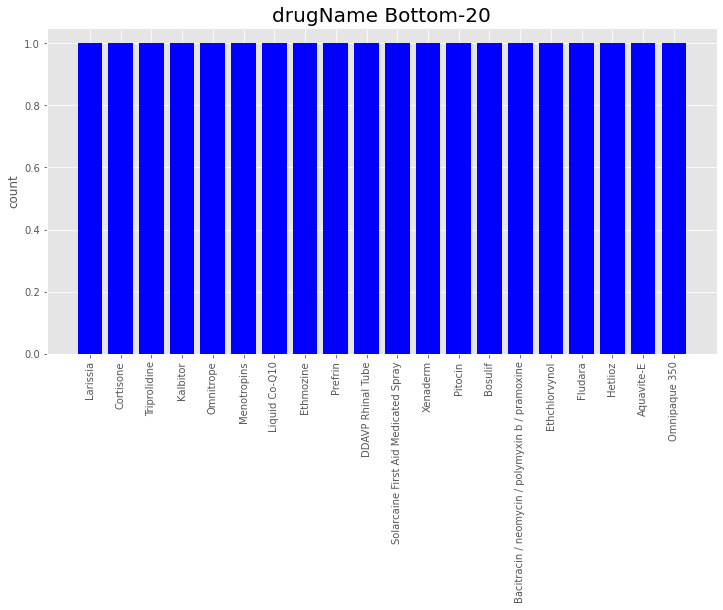

In [18]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_bottom = merged_data['drugName'].value_counts(ascending = False).tail(20)

plt.bar(drugName_bottom.index,drugName_bottom.values,color='blue')
plt.title('drugName Bottom-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

* The bottom 20 drugName has count 1. These might be the drugs used of rare conditions or are new in market.

### Checking Ratings Distribution

In [19]:
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   rating  counts    percent
0      10   68005  31.620967
1       9   36708  17.068487
2       1   28918  13.446292
3       8   25046  11.645890
4       7   12547   5.834104
5       5   10723   4.985981
6       2    9265   4.308040
7       3    8718   4.053696
8       6    8462   3.934661
9       4    6671   3.101882


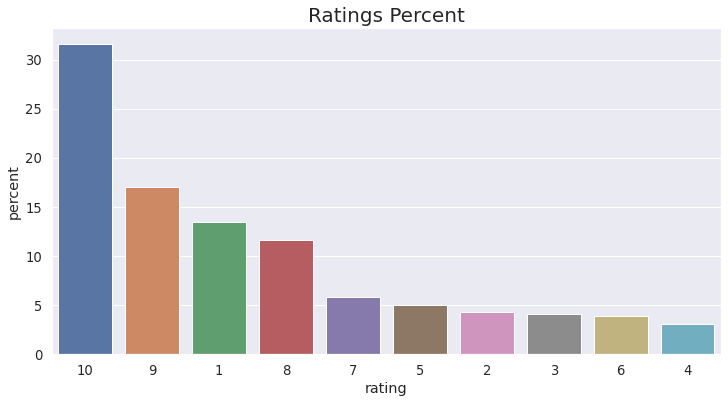

In [20]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

We notice that most of the ratings are high with ratings 10 and 9.
rating 1 is also high which shows the extreme ratings of the user. We can say that the users mostly prefer to rate when the drugs are either very useful to them or the drugs fails, or there is some side effects. About 70% of the values have rating greater than 7.

### Check the distribution of usefulCount

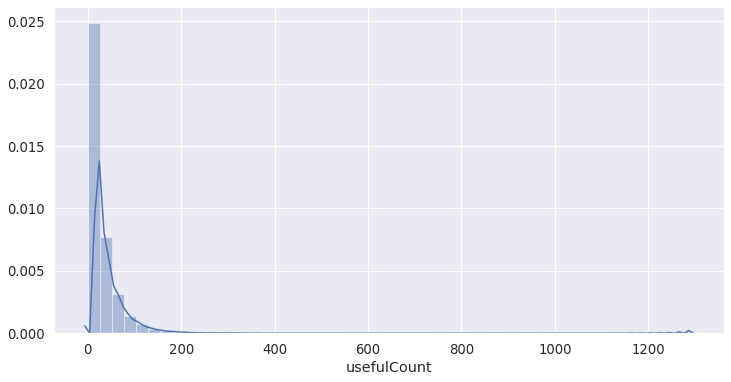

In [21]:
#plot a distplot of usefulCount
sns.distplot(merged_data['usefulCount'])
plt.show()

* usefulCount is positively-skewed.
* Most of the usefulCounts are distributed between 0 and 200.
* There are extreme outliers present in our usefulCounts. We either have to remove them or transform them.

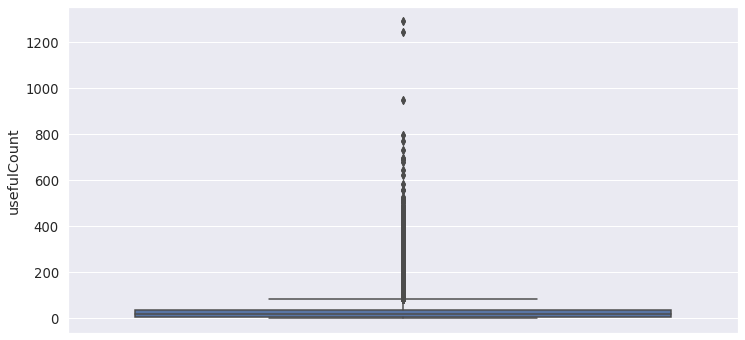

In [22]:
#check the descriptive summary
sns.boxplot(y = merged_data['usefulCount'])
plt.show()

We can see that there are huge outliers present in our dataset. Some drugs have extreme useful counts.

### Check number of Drugs per condition

In [23]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
not listed / othe                             253
pain                                          219
birth control                                 181
high blood pressure                           146
acne                                          127
depression                                    115
rheumatoid arthritis                          107
diabetes, type 2                               97
allergic rhinitis                              95
insomnia                                       85
osteoarthritis                                 84
bipolar disorde                                82
anxiety                                        81
abnormal uterine bleeding                      77
endometriosis                                  64
3</span> users found this comment helpful.     62
psoriasis                                      61
migraine                                       60
adhd                                           58
4</span> users found this comment helpfu

If we look above the top value is not listed/othe. 
* It might be possible that the user didn't mentioned his/her condition as sometimes people doesn't want to reveal thier disorders. We can look up the drug names and fill up the conditions for which that drug is used.

* Another point to note here is that there are values is condition like **'3 <_/span_> user found this comment helpful'**, **4<_/span_> users found this comment helpful**. These are the noises present in our dataset. The dataset appears to have been extracted through webscraping, the values are wrongly fed in here.

##### Let's look at ''3 <_/span_> user found this comment helpful'

In [24]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


 There are only 0.54 % values with  </span  type data. We can remove these from our dataset as we won't lose much information by removing them.

In [25]:
#drop the nosie 
merged_data.drop(span_data.index, axis = 0, inplace=True)

### Now let's look at the not listed/other

In [26]:
#check the percentage of 'not listed / othe' conditions
not_listed = merged_data[merged_data['condition'] == 'not listed / othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/merged_data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))

Number of not_listed values :  592
Total percent of noisy data 0.2767751949582032 %  


There are 592 unique drugs for "not / listed othe "  values. There are 2 options  to deal with these values  
1. Check the condition associated with the drugs and replace the values.
2. We can drop the values as these only accounts for 0.27 % of total data. To save our time we will drop the nosiy data.

In [27]:
# drop noisy data
merged_data.drop(not_listed.index, axis = 0, inplace=True)

In [28]:
# after removing the noise, let's check the shape
merged_data.shape[0]

213300

### Now Check number of drugs present per condition after removing noise

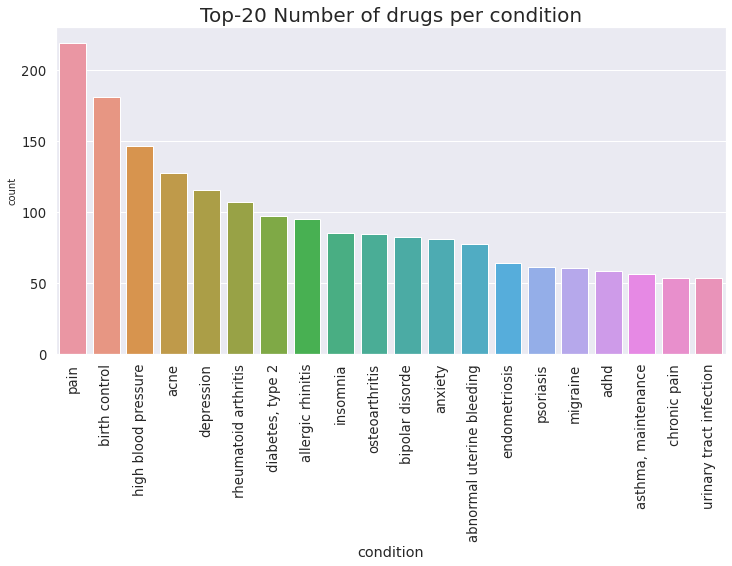

In [29]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

* Most of the drugs are for pain, birth control and high blood pressure which are common conditions.
* In top- 20 each condition has above 50 drugs.

### Check bottom 20 drugs per conditions

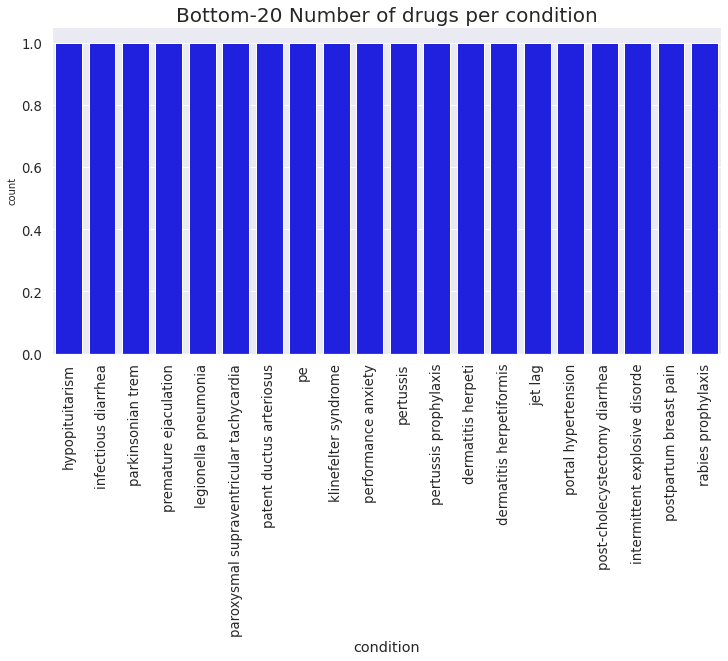

In [30]:
#bottom-20
condition_gp_bottom_20 = conditions_gp.tail(20)
#plot the top 20

sns.barplot(x = condition_gp_bottom_20.index, y = condition_gp_bottom_20.values,color='blue')
plt.title('Bottom-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

Bottom-20 conditions just have single drugs. These are the rare conditions.

### Now let's check if a single drug can be used for Multiple conditions

In [31]:
#let's check if a single drug is used for multiple conditions
drug_multiple_cond = merged_data.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

drugName
Prednisone       38
Gabapentin       30
Ciprofloxacin    24
Doxycycline      24
Amitriptyline    23
Venlafaxine      22
Metronidazole    22
Dexamethasone    21
Triamcinolone    19
Azithromycin     19
Name: condition, dtype: int64


There are many drugs which can be used for multiple conditions. 

### Check the number of drugs with rating 10

In [32]:
#Let's check the Number of drugs with rating 10.
merged_data[merged_data['rating'] == 10]['drugName'].nunique()

2910

We have 2907 drugs with rating 10.

### Check number of drugs with rating 10

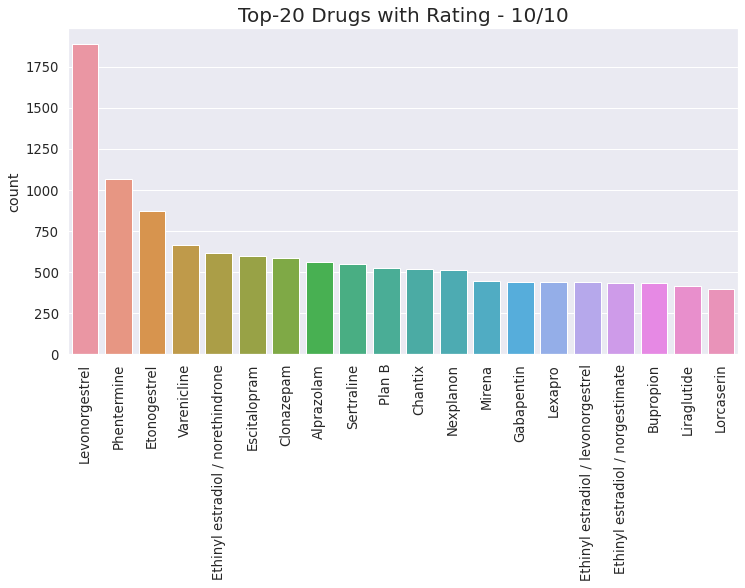

In [33]:
#Check top 20 drugs with rating=10/10
top_20_ratings = merged_data[merged_data['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

* We can see that Levonorgestrel has most of the ratings 10/10. It seems it is used for the common condition and, it would be the most effective one.
* Other drugs have ratings between 1000 and 500 from top-20 10/10.

### Check for what condition Levonorgestrel is used for

In [34]:
merged_data[merged_data['drugName'] == 'Levonorgestrel']['condition'].unique()

array(['emergency contraception', 'birth control',
       'abnormal uterine bleeding', nan], dtype=object)

Levonorgestrel is used for 3 different conditions. 
* emergency contraception
* birth control
* abnormal uterine bleeding

### Top 10 drugs with 1/10 Rating

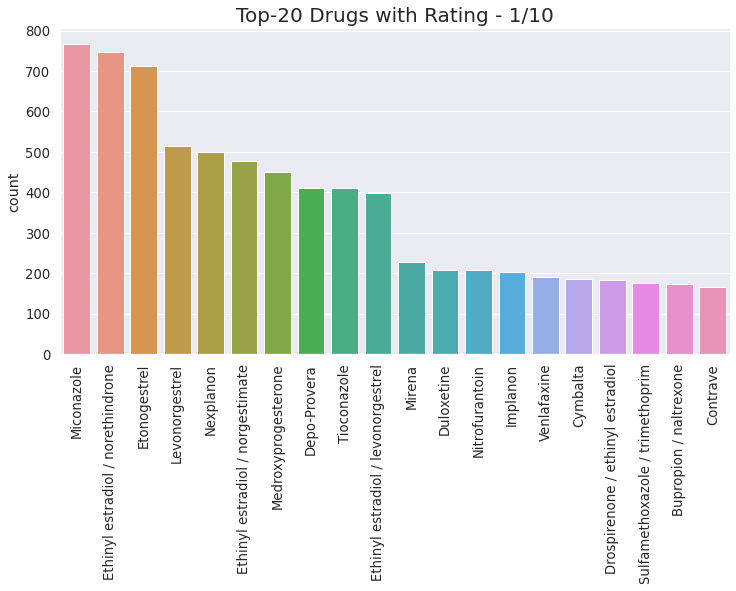

In [35]:
#check top 20 drugs with 1/10 rating

top_20_ratings_1 = merged_data[merged_data['rating'] == 1]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings_1.index, y = top_20_ratings_1.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 1/10', fontsize=20)
plt.ylabel('count')
plt.show()

Top-3 of 1/10 ratings have almost 700 counts. Which means they are not so useful drugs.

### Now we will look at the Date column

In [36]:
# convert date to datetime and create year andd month features

merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year  #create year
merged_data['month'] = merged_data['date'].dt.month #create month

### Check Number of reviews per year

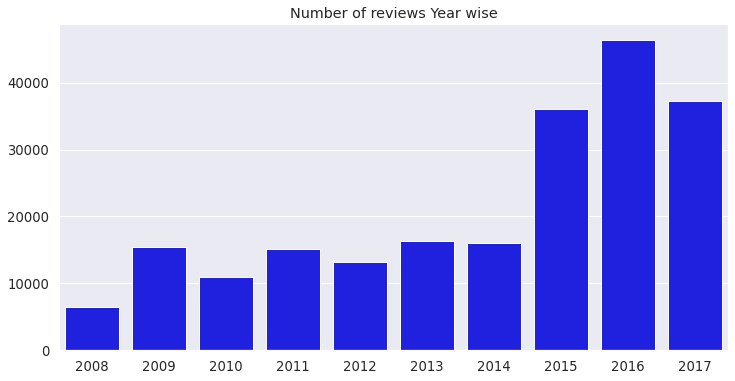

In [37]:
#plot number of reviews year wise
count_reviews = merged_data['year'].value_counts().sort_index()
sns.barplot(count_reviews.index,count_reviews.values,color='blue')
plt.title('Number of reviews Year wise')
plt.show()

The year 2015, 2016 and 2017 accounts for the most reviews. Almost 60% of the reviews are from these years.

### Check average rating per year

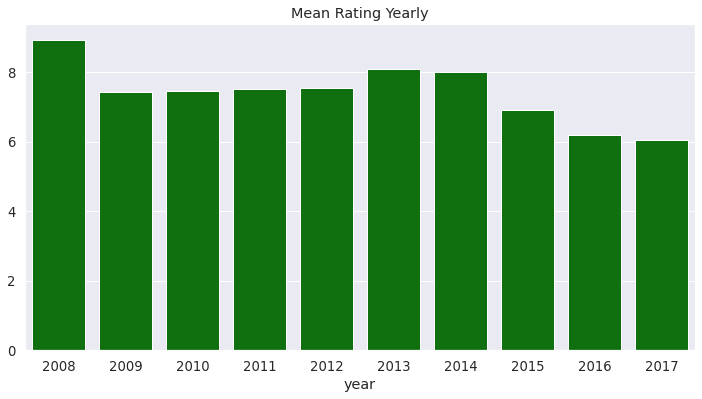

In [38]:
#check average rating per year
yearly_mean_rating = merged_data.groupby('year')['rating'].mean()
sns.barplot(yearly_mean_rating.index,yearly_mean_rating.values,color='green')
plt.title('Mean Rating Yearly')
plt.show()

* Rating has been almost constant from year 2009 - 2014 but after 2014 the ratings has started to decrease.
* As the number of reviews has increased for last 3 years, the rating has decreased.

### Per year drug count and Condition count

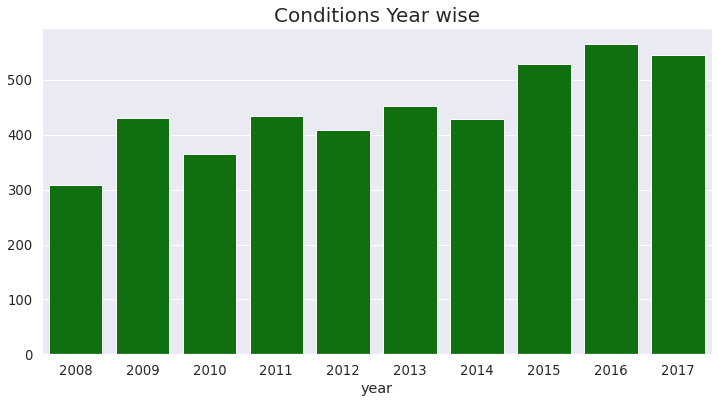

In [39]:
#check year wise drug counts and year wise conditions counts

year_wise_condition = merged_data.groupby('year')['condition'].nunique()
sns.barplot(year_wise_condition.index,year_wise_condition.values,color='green')
plt.title('Conditions Year wise',fontsize=20)
plt.show()

* Condition has increased in last 3 years. Which means the new conditions has been coming up.
* Starting year 2008 had lowest number of conditions. 

**We expect that as the the conditions has increased. Drugs should have also increased. Let's check that out.**

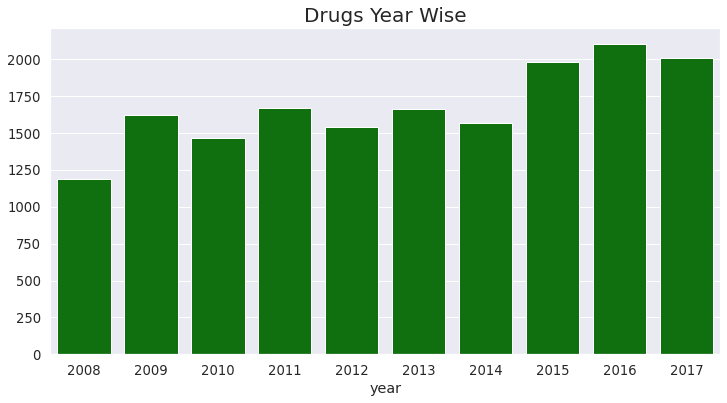

In [40]:
#check drugs year wise

year_wise_drug = merged_data.groupby('year')['drugName'].nunique()
sns.barplot(year_wise_drug.index,year_wise_drug.values,color='green')
plt.title('Drugs Year Wise',fontsize=20)
plt.show()

As expected number of drugs has also increased in last three years.

## Data Pre-Processing

In [41]:
# check the null values
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
dtype: int64

We only have null values in condition. We will drop the records with null values as it only accounts for 0.5 % of total data.

In [42]:
# drop the null values
merged_data.dropna(inplace=True, axis=0)

### Pre-Processing Reviews

**Check the first few reviews**

In [43]:
#check first three reviews
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

### Steps for reviews pre-processing.
* **Remove HTML tags**
     * Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</_span_>...", we will use get_text() to remove the html tags if there are any.
* **Remove Stop Words**
     * Remove the stopwords like "a", "the", "I" etc.
* **Remove symbols and special characters**
     * We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
* **Tokenize**
     * We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
* **Stemming**
     * Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word"

In [44]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [45]:
#apply review_to_words function on reviews
merged_data['review'] = merged_data['review'].apply(review_to_words)

### Now we will create our target variable "Sentiment" from rating

In [46]:
#create sentiment feature from ratings
#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

We will predict the sentiment using the reviews only. So let's start building our model.

## Building Model

In [47]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

We all know that we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

### TfidfVectorizer (Term frequency - Inverse document frequency)
**TF - Term Frequency** :- 

How often a term t occurs in a document d.

TF = (_Number of occurences of a word in document_) / (_Number of words in that document_)

**Inverse  Document Frequency**

IDF = log(Number of sentences / Number of sentence containing word)

**Tf - Idf = Tf * Idf**


In [48]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape

(212106, 34618)

We have built reviews_corpus which are the independent feature in our model. 

### **Store Dependent feature in sentiment and split the Data into train and test**

In [49]:
#dependent feature
sentiment = merged_data['sentiment']
sentiment.shape

(212106,)

In [50]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142111, 34618) (142111,)
Test data shape  (69995, 34618) (69995,)


### Apply Multinomial Naive Bayes

In [51]:
#fit the model and predicct the output

clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.7585256089720694
Confusion Matrix
[[ 4553   632]
 [16270 48540]]


We have got accuracy score of 75.8% by using NaiveBayes

### Apply RandomForest

In [52]:
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.8978784198871348
Confusion Matrix
[[14168   493]
 [ 6655 48679]]


## Conclusion 
After applying the TfidfVectorizer to transform our reviews in Vectors and applying NaiveBayes and RandomForestClassifier we see that RandomForestClassifier outperforms MulinomialNB. We have achieved accuracy of 89.7 % after applying RandomForestClassifier without any parameter tuning. We can tune the parameters of our classifier and improve our accuracy.